In [39]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [43]:
topic_n = 10

lib = "./new_model/liberal_"+str(topic_n)+".model"
con = "./new_model/conserv_"+str(topic_n)+".model"

lib_model = LdaModel.load(lib)
con_model = LdaModel.load(con)

In [44]:
l = []
c = []

for t in range(topic_n):
    l_topic = lib_model.show_topic(t)
    c_topic = con_model.show_topic(t)
    for word,_ in l_topic:
        l.append(word)
    for word,_ in c_topic:
        c.append(word)

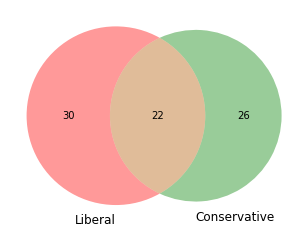

In [45]:
# Show Venn diagram
venn2([set(l), set(c)], set_labels = ('Liberal', 'Conservative'))
plt.show()

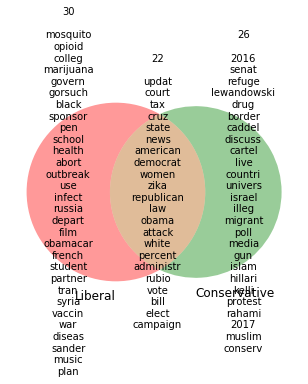

In [47]:
l = set(l)
c = set(c)
v = venn2([l,c], set_labels = ('Liberal', 'Conservative'))

for id, data in zip(['10', '11', '01'], [l-c, l&c, c-l]):
    num = v.get_label_by_id(id).get_text()
    v.get_label_by_id(id).set_text(num+'\n\n' + '\n'.join(data))

plt.show()